<a href="https://colab.research.google.com/github/agapiko/Early_Detection_Of_DIABETIC_RETINOPATHY/blob/main/Preprocessing_of_APTOS_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
base_image_dir = '/content/drive/My Drive/original_images/train_images'
save_dir = '/content/drive/My Drive/train_images_ben_preprocessed_sigmaX10'

In [4]:
os.makedirs(save_dir, exist_ok=True)

In [15]:
# Image preprocessing functions
def crop_image_from_gray(img, tol=7):
    if img.ndim == 2:
        mask = img > tol
        return img[np.ix_(mask.any(axis=1), mask.any(axis=0))]

    elif img.ndim == 3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img > tol
        check_shape = img[:, :, 0][np.ix_(mask.any(1), mask.any(0))].shape[0]
        if check_shape == 0:
            return img
        else:
            img1 = img[:, :, 0][np.ix_(mask.any(1), mask.any(0))]
            img2 = img[:, :, 1][np.ix_(mask.any(1), mask.any(0))]
            img3 = img[:, :, 2][np.ix_(mask.any(1), mask.any(0))]
            img = np.stack([img1, img2, img3], axis=-1)
        return img

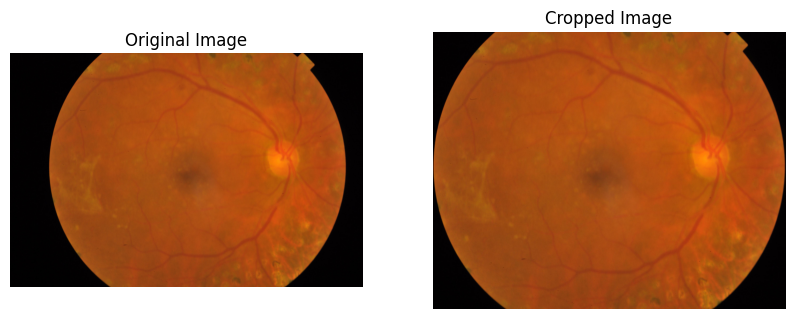

In [12]:
# Display a single original image and its cropped version for comparison
path = os.path.join(base_image_dir, '001639a390f0.png')  # Replace with an actual filename in your directory
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.title("Original Image")
plt.imshow(img)

img_cropped = crop_image_from_gray(img)
plt.subplot(1, 2, 2)
plt.axis('off')
plt.title("Cropped Image")
plt.imshow(img_cropped)
plt.show()

In [14]:
def preprocess(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = crop_image_from_gray(image)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image = cv2.addWeighted(image, 4, cv2.GaussianBlur(image, (0, 0), 10), -4, 128)
    return image

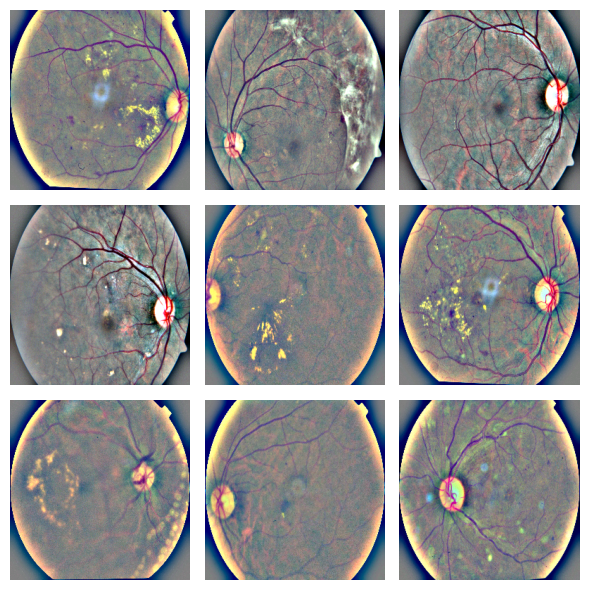

In [13]:
# Display the first 9 processed images in a 3x3 grid
x_train = [os.path.join(base_image_dir, filename) for filename in os.listdir(base_image_dir) if filename.endswith(".png")]

plt.figure(figsize=(6, 6))
for y, x in enumerate(x_train[:9]):
    plt.subplot(3, 3, y + 1)
    plt.axis('off')
    i = preprocess(x)
    plt.imshow(i)
plt.tight_layout()
plt.show()

In [8]:
# Process and save images
IMG_SIZE = 256
for filename in os.listdir(base_image_dir):
    if filename.endswith(".png"):
        image_path = os.path.join(base_image_dir, filename)
        processed_image = preprocess(image_path)
        save_path = os.path.join(save_dir, filename)
        processed_image_bgr = cv2.cvtColor(processed_image, cv2.COLOR_RGB2BGR)
        cv2.imwrite(save_path, processed_image_bgr)